In [1]:
from DiffEqPy import Variable, DataLoader
from DiffEqPy.functions import *
from DiffEqPy.utils import *
from DiffEqPy.layers import *
from DiffEqPy.models import MLP
from DiffEqPy.optimizers import SGD
from DiffEqPy.datasets import *
import DiffEqPy
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import os

In [2]:
def f(x):
    x = x.flatten()
    x = x.astype(np.float32)
    x /= 255.
    return x

In [3]:
batch_size = 100
max_epoch = 5
hidden_size = 1000

train_set = MNIST(train = True, transform=f)
test_set = MNIST(train = False, transform=f)
train_loader = DataLoader(train_set , batch_size)
test_loader = DataLoader(test_set , batch_size, shuffle=False)

model = MLP((hidden_size, hidden_size,10), activation = F.relu)
optimizer = SGD(1e-2).setup(model)

5


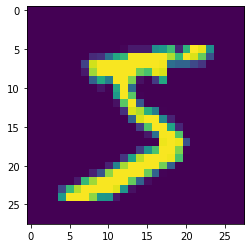

In [4]:
x,t = train_set[0]
print(t)
plt.imshow(x.reshape(28,28))

In [5]:
if DiffEqPy.cuda.gpu_enable:
    train_loader.to_gpu()
    test_loader.to_gpu()
    model.to_gpu()

In [6]:
ret = {}
ret["train_loss"] = []
ret["test_loss"] = []
ret["train_accuracy"] = []
ret["test_accuracy"] = []

for epoch in range(max_epoch):
    start = time.time()
    sum_loss, sum_acc = 0, 0    
    
    for x,t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    end = time.time()
    print("epoch: {}, time: {}".format(epoch+1, end - start))
    print("train loss: {:.4f}, accuracy: {:.4f}".format(sum_loss / len(train_set), sum_acc / len(train_set)))
    ret["train_loss"].append(sum_loss / len(train_set))
    ret["train_accuracy"].append(sum_acc / len(train_set))
        
    sum_loss, sum_acc = 0,0
    with DiffEqPy.no_grad():
        for x,t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y,t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)
    print("test loss: {:.4f}, accuracy: {:.4f}".format(sum_loss / len(test_set), sum_acc / len(test_set)))
    ret["test_loss"].append(sum_loss / len(test_set))
    ret["test_accuracy"].append(sum_acc / len(test_set))

epoch: 1, time: 4.838318347930908
train loss: 1.0534, accuracy: 0.7831
test loss: 0.4813, accuracy: 0.8814
epoch: 2, time: 4.612078428268433
train loss: 0.4176, accuracy: 0.8900
test loss: 0.3442, accuracy: 0.9063
epoch: 3, time: 4.606511354446411
train loss: 0.3362, accuracy: 0.9069
test loss: 0.2984, accuracy: 0.9169
epoch: 4, time: 4.605921506881714
train loss: 0.2982, accuracy: 0.9161
test loss: 0.2698, accuracy: 0.9269
epoch: 5, time: 4.6086859703063965
train loss: 0.2731, accuracy: 0.9229
test loss: 0.2508, accuracy: 0.9317


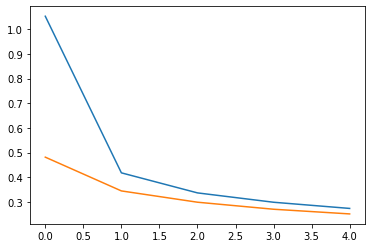

In [7]:
plt.plot(ret["train_loss"])
plt.plot(ret["test_loss"])

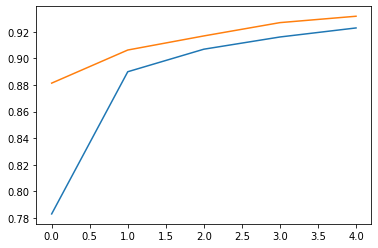

In [8]:
plt.plot(ret["train_accuracy"])
plt.plot(ret["test_accuracy"])